In [449]:
import sys
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## force is 0.2, which is 13pN.

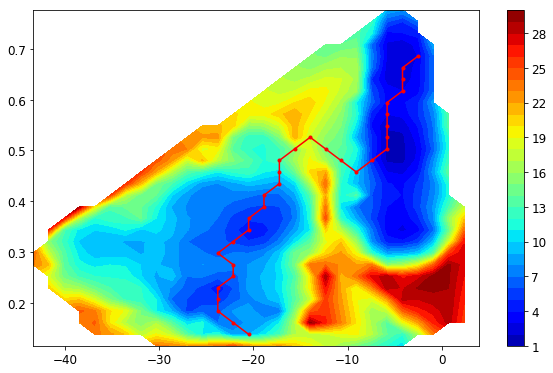

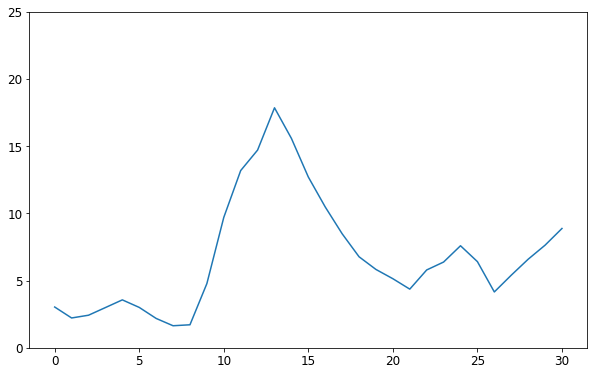

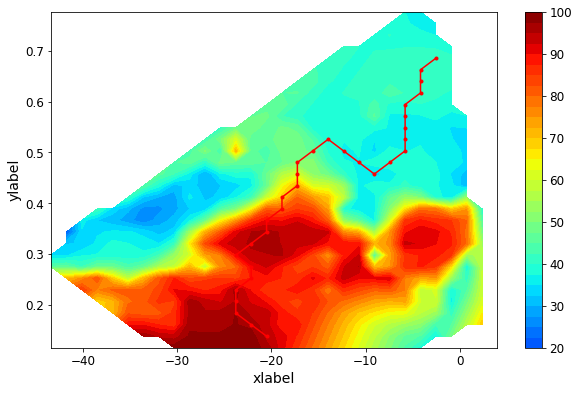

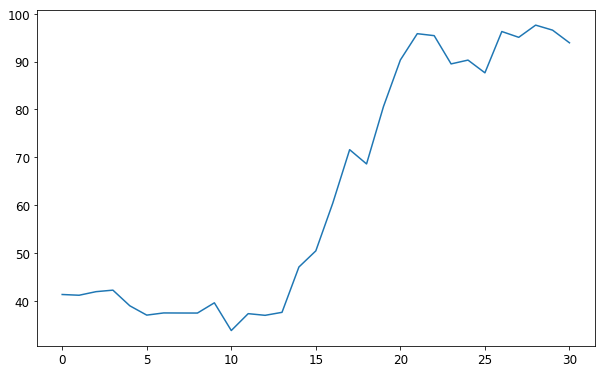

In [284]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 260
location = pre + "/sixth_with_real_distance_2/_280-350/2d_z_qw/without_subsample_force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [450]:
all_data = pd.read_feather("/Users/weilu/Research/data/pulling/None_29_Mar_153435.feather")

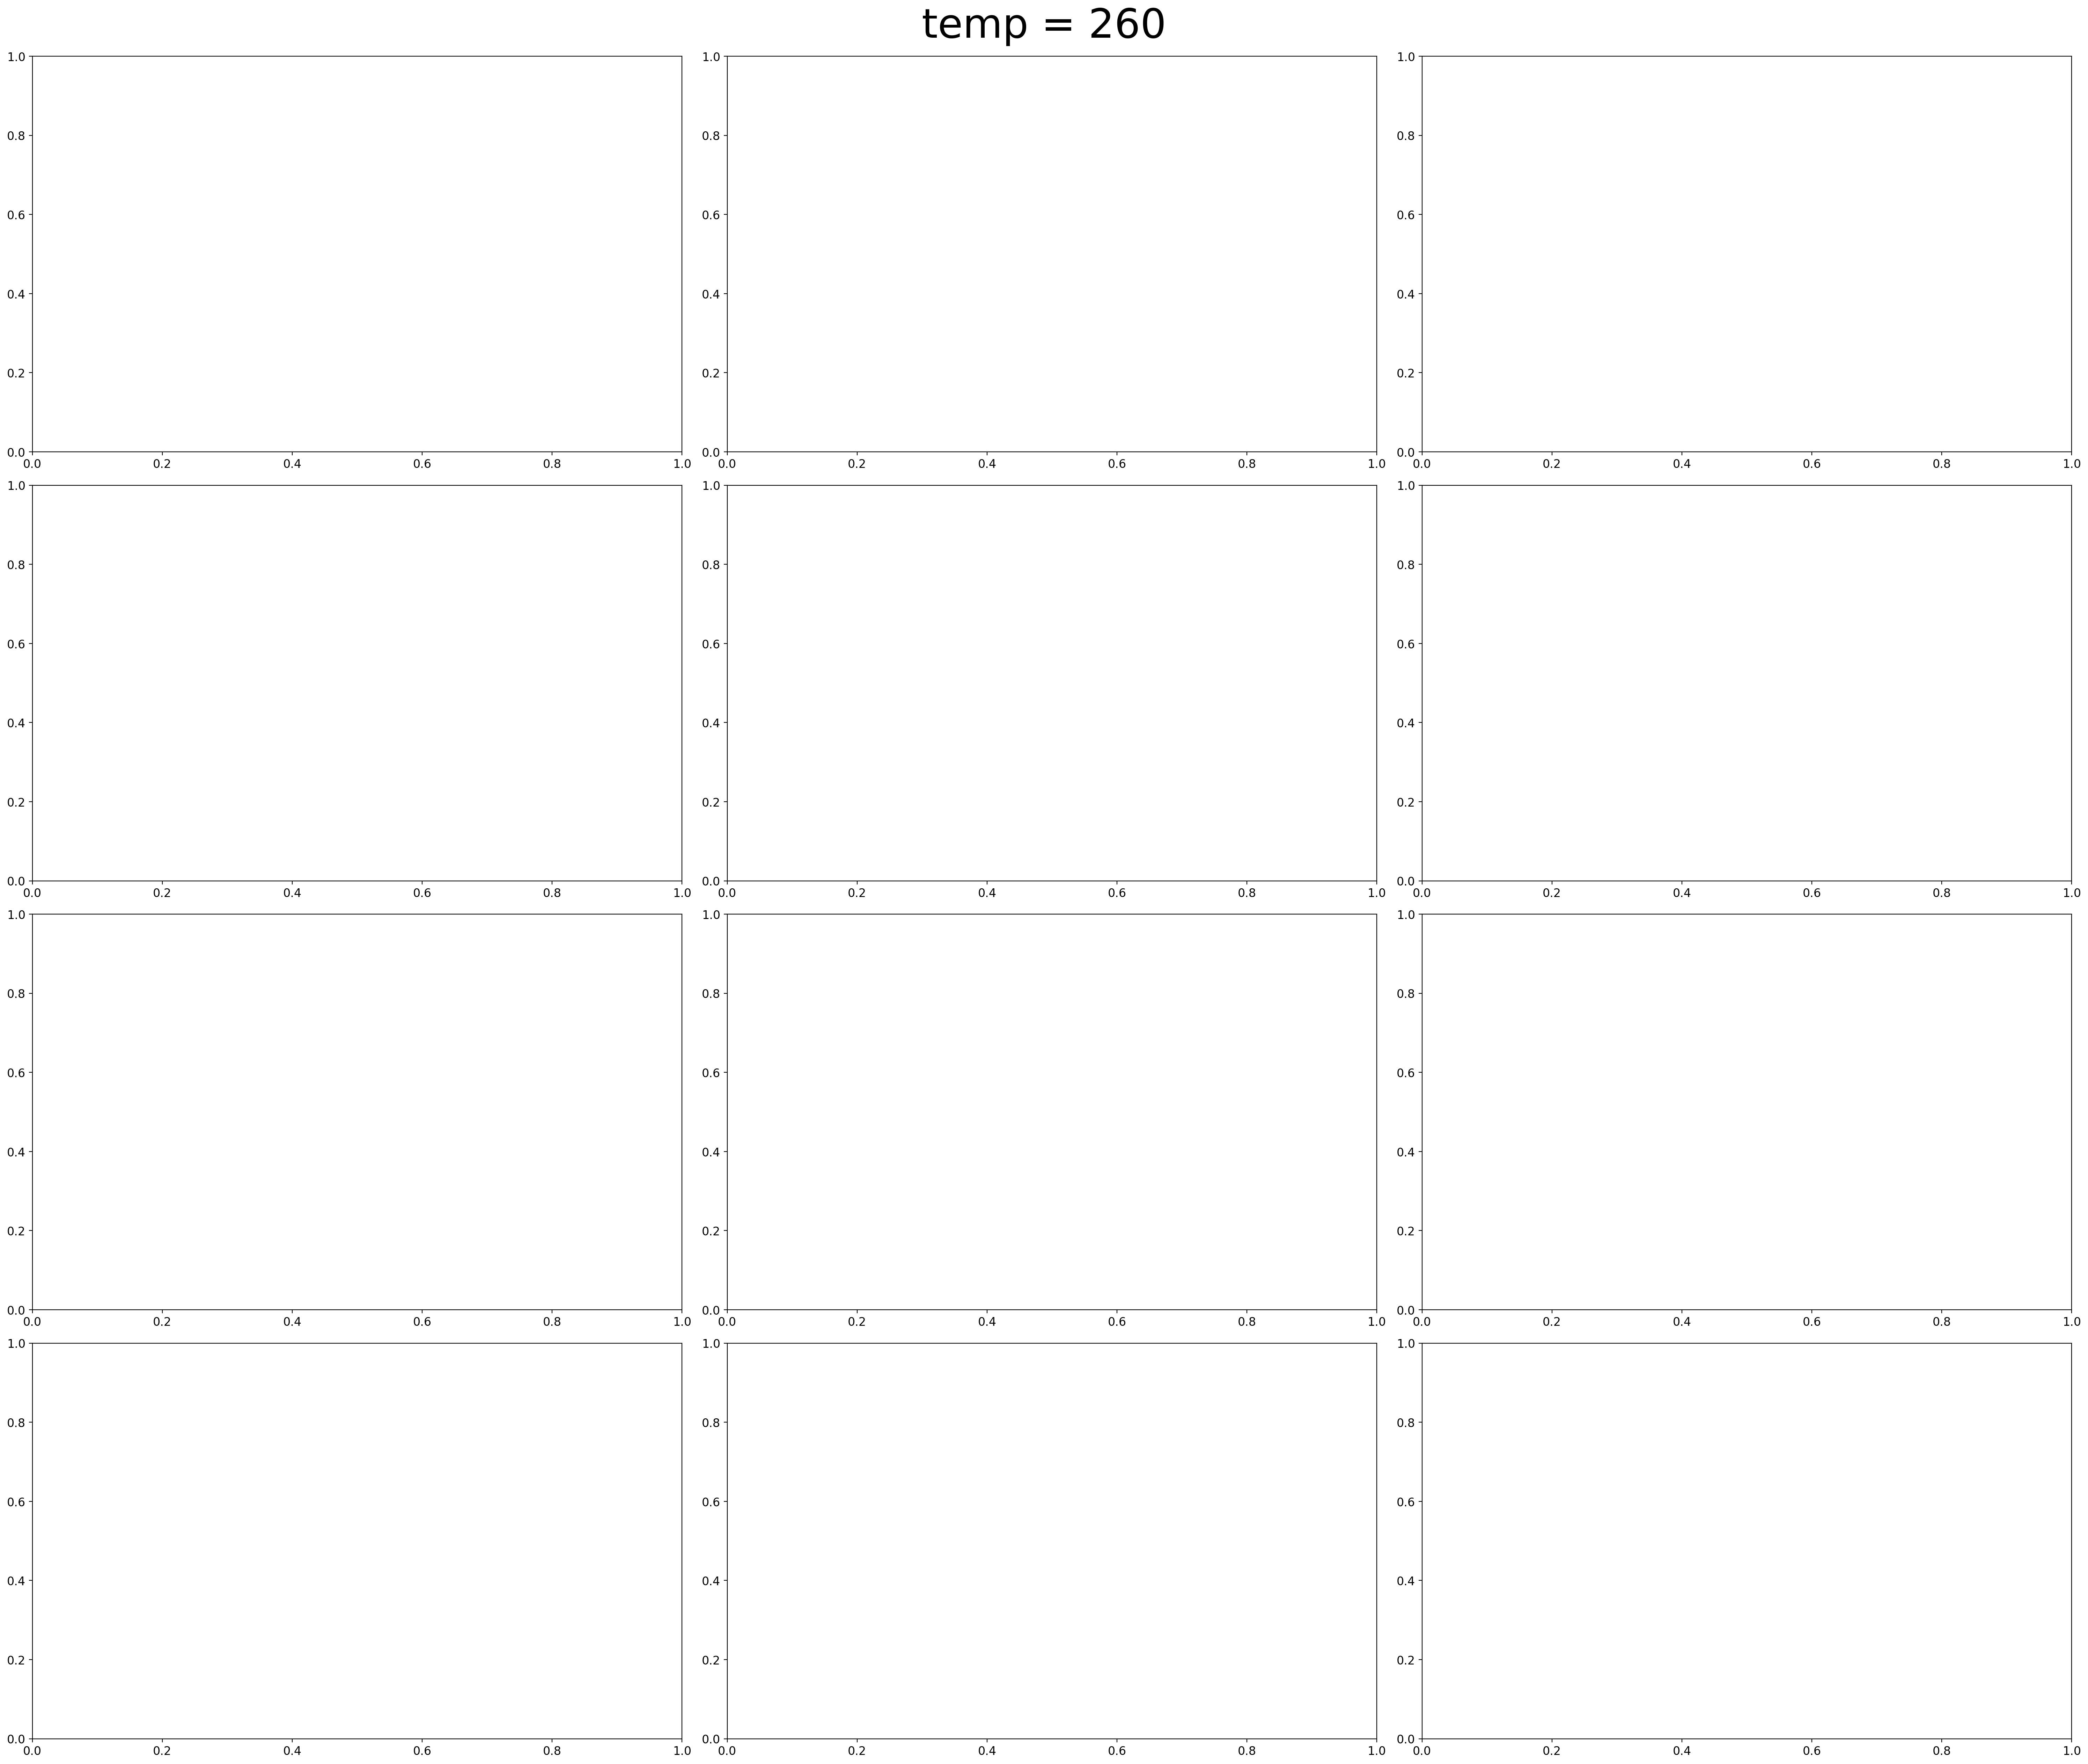

In [455]:
show_images_all(all_data, temp='260')

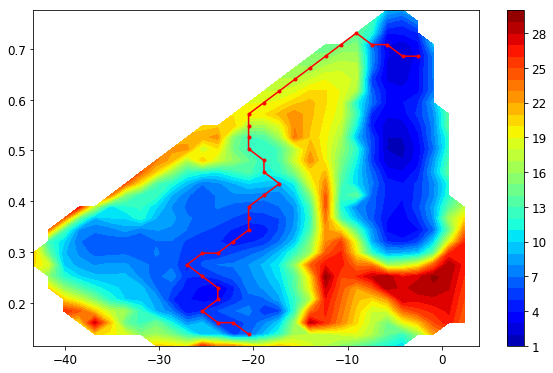

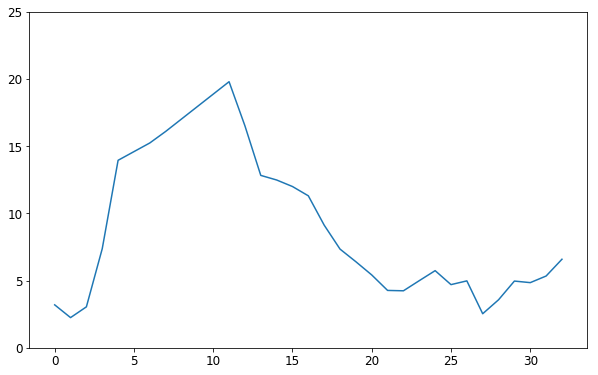

In [448]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_freeEnergy/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"perturbation-8-pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)

In [395]:
tt_list = []
for i in range(36):
    pre = "/Users/weilu/Research/server/mar_2018/05_week"
    temp = 260
    location = pre + f"/sixth_new_localQ/_280-350/{i}/force_0.2/"
    location2 = location + f"pmf-{temp}.dat"
    path, _ = shortest_path(location2, start=(1, 14), plot2d=False, plot1d=False)
    location2 = location + f"evpb-{temp}.dat"
    start = i*5
    if i == 35:
        span = 6
    else:
        span = 5
    tt = get_localQ(location2, path, start=start, span=span)
    tt_list.append(tt.T)
tt = np.concatenate(tt_list)

In [331]:
tt_list = []
for i in range(18):
    pre = "/Users/weilu/Research/server/mar_2018/05_week"
    temp = 260
    location = pre + f"/sixth_localQ/_280-350/{i}/force_0.2/"
    location2 = location + f"pmf-{temp}.dat"
    path, _ = shortest_path(location2, start=(1, 14), plot2d=False, plot1d=False)
    location2 = location + f"evpb-{temp}.dat"
    start = i*10
    if i == 17:
        span = 11
    else:
        span = 10
    tt = get_localQ(location2, path, start=start, span=span)
    tt_list.append(tt.T)
tt = np.concatenate(tt_list)

In [418]:
localQ = pd.DataFrame(tt, columns=["F" + str(i) for i in range(31)])

In [419]:
localQ["Sum"] = localQ.sum(axis=1)

In [420]:
tt2 = localQ.query("Sum > 0").drop("Sum",axis=1).values

In [422]:
localQ.query("Sum > 0").drop("Sum",axis=1)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,0.417368,0.030776,0.010402,0.076318,0.116411,0.527823,0.325694,0.018196,0.006532,0.044855,...,0.043346,0.065919,0.038686,0.073150,0.174449,0.115047,0.005069,0.015043,0.024454,0.011752
1,0.238378,0.044093,0.171889,0.132820,0.126133,0.434124,0.311684,0.442784,0.231669,0.197286,...,0.434422,0.327424,0.420209,0.320348,0.371230,0.373383,0.200745,0.210607,0.202129,0.225797
2,0.430454,0.122703,0.199567,0.195034,0.209467,0.351270,0.341446,0.414711,0.338968,0.246756,...,0.443263,0.387867,0.454237,0.379872,0.344621,0.340151,0.219174,0.226466,0.242445,0.237625
3,0.313310,0.162464,0.226719,0.155803,0.176533,0.574288,0.466381,0.603111,0.790635,0.689010,...,0.718692,0.710747,0.723813,0.709896,0.646175,0.623073,0.559585,0.532126,0.516597,0.517309
4,0.016765,0.002083,0.082779,0.041785,0.076663,0.405532,0.166864,0.253367,0.501725,0.450589,...,0.749508,0.624262,0.628087,0.699025,0.665394,0.560510,0.491314,0.517311,0.539386,0.612450
5,0.191682,0.020478,0.062664,0.092489,0.063972,0.451150,0.456175,0.398276,0.744869,0.801986,...,0.877815,0.874167,0.865873,0.861832,0.839990,0.777750,0.643223,0.638145,0.648508,0.636068
6,0.456803,0.303028,0.320128,0.370198,0.214465,0.524216,0.470012,0.446913,0.656007,0.656398,...,0.607795,0.584774,0.607537,0.626115,0.597006,0.627149,0.723158,0.723956,0.729235,0.704183
7,0.223695,0.058280,0.220780,0.235670,0.087859,0.301544,0.231158,0.163056,0.323506,0.274237,...,0.118108,0.202271,0.252010,0.264323,0.218492,0.281985,0.426985,0.435140,0.468382,0.544443
8,0.026097,0.011340,0.032998,0.034967,0.024274,0.008860,0.010131,0.008753,0.002349,0.008365,...,0.008415,0.012638,0.009097,0.056492,0.023453,0.031167,0.092744,0.085157,0.134573,0.182112
9,0.298846,0.158830,0.198185,0.256381,0.147859,0.245216,0.313426,0.315529,0.460333,0.579380,...,0.665624,0.650382,0.648231,0.659857,0.629542,0.578722,0.435636,0.475250,0.479870,0.513982


In [396]:
tt.shape

(181, 31)

In [417]:
tt2

array([[  4.17367558e-01,   3.07759175e-02,   1.04022800e-02, ...,
          2.44541333e-02,   1.17521556e-02,   3.66736666e+00],
       [  2.38377815e-01,   4.40934686e-02,   1.71889294e-01, ...,
          2.02129339e-01,   2.25796509e-01,   9.62918214e+00],
       [  4.30454464e-01,   1.22702951e-01,   1.99567439e-01, ...,
          2.42445368e-01,   2.37625230e-01,   1.08843305e+01],
       ..., 
       [ -4.88505747e-04,   1.79055842e-03,   2.59718945e-01, ...,
          2.29593050e-01,   2.48843730e-01,   6.02460304e+00],
       [ -4.88505747e-04,   1.19370561e-03,   5.13262062e-01, ...,
          2.40239291e-01,   2.68140087e-01,   7.48072232e+00],
       [ -4.88505747e-04,   0.00000000e+00,   1.31675881e-01, ...,
          1.98381187e-02,   1.47980948e-03,   1.79627685e+00]])

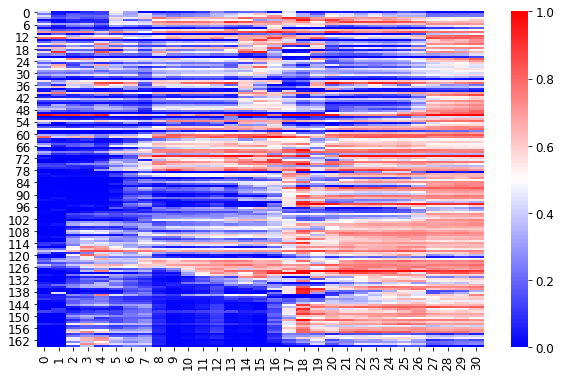

In [421]:
plt.figure()
sns.heatmap(tt2, cmap="bwr")
# plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ.png", dpi=300)

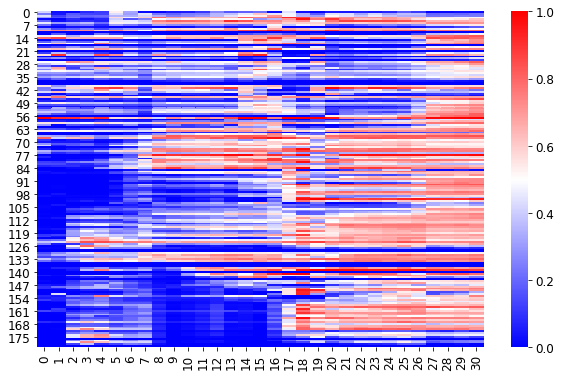

In [398]:
plt.figure()
sns.heatmap(tt, cmap="bwr")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ.png", dpi=300)

In [ ]:
x = np.linspace(0, 31)

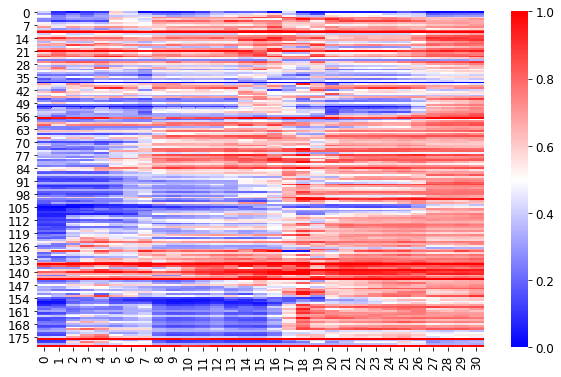

In [344]:
plt.figure()
sns.heatmap(tt, cmap="bwr")
plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/shortest_path_localQ.png", dpi=300)

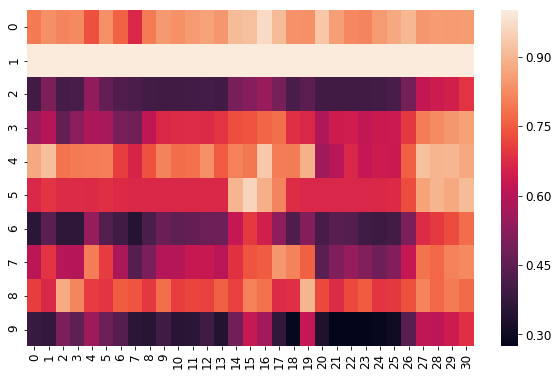

In [324]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_localQ/_280-350/1/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, _ = shortest_path(location2, start=(1, 14), plot2d=False, plot1d=False)
location2 = location + f"evpb-{temp}.dat"

plt.figure()
tt = get_localQ(location2, path)
sns.heatmap(tt.T)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_localQ.png", dpi=300)
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)

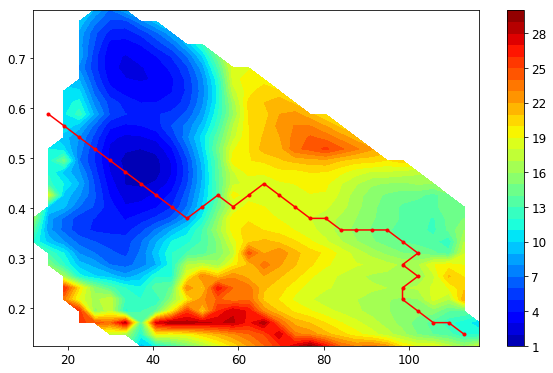

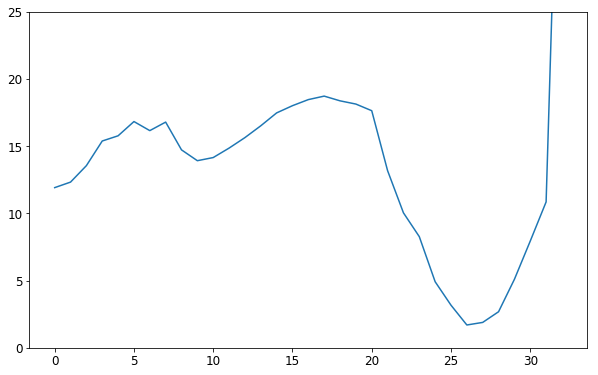

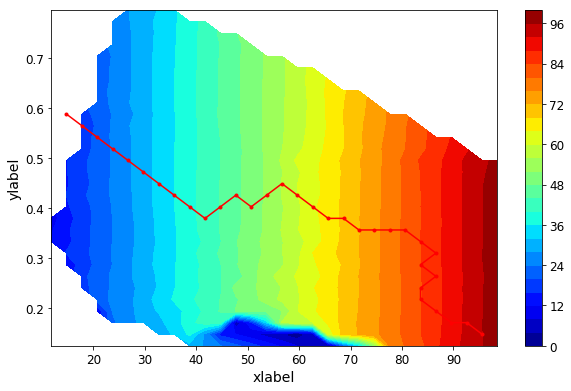

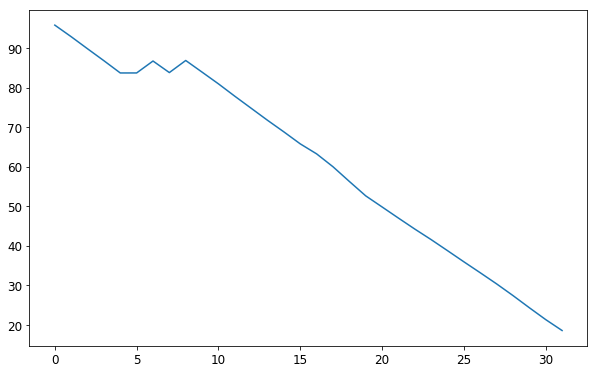

In [394]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 280
location = pre + "/eighth_with_real_distance/_280-350/2d_qw_dis/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(20, 1), end=(1, 28), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

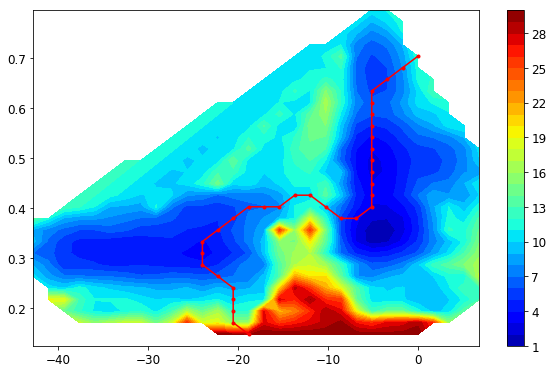

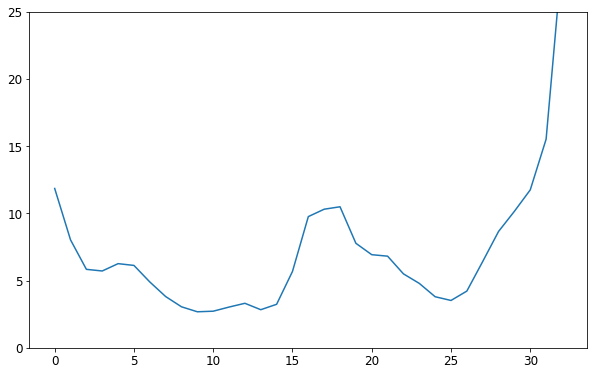

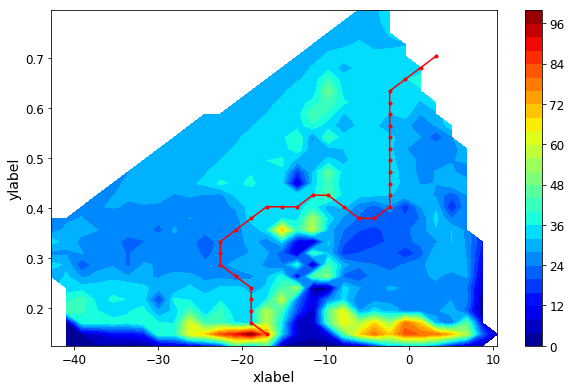

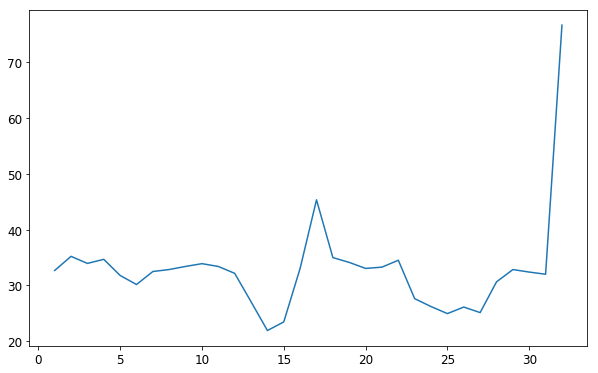

In [377]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 300
location = pre + "/eighth_with_real_distance/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

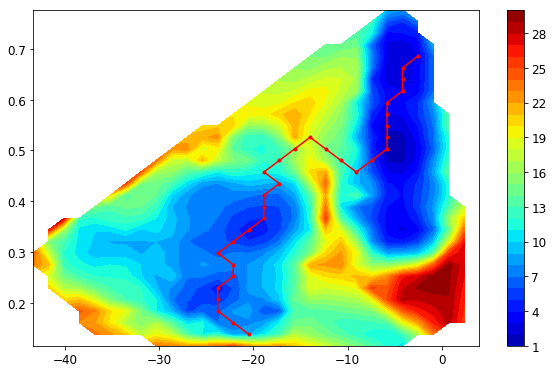

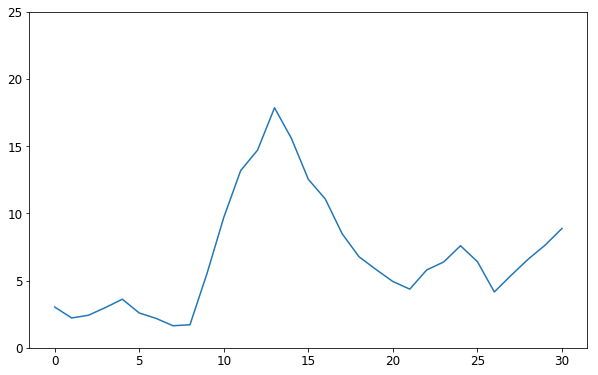

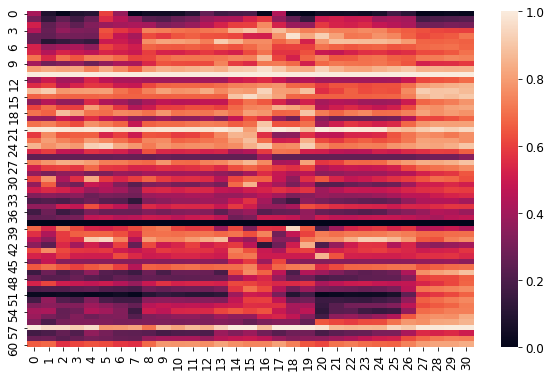

In [283]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_localQ/_280-350/first/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, _ = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"

plt.figure()
tt = get_localQ(location2, path)
sns.heatmap(tt.T)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_localQ.png", dpi=300)
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)

In [277]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_localQ/_280-350/second/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, _ = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)

plt.figure()
data = pd.read_table(location2, sep='\s+', skiprows=1, names=[ "x", "y"] + ["Q" +str(i) for i in range(62)])
d = data.dropna().values
res = 30
xi = np.linspace(min(d[:,1]), max(d[:,1]), res)
yi = np.linspace(min(d[:,2]), max(d[:,2]), res)
xv, yv = np.meshgrid(xi, yi)
zi = griddata((d[:,1], d[:,2]), d[:,3:], (xv, yv), method='linear')
nested_lst_of_tuples = [tuple(l) for l in path]
tt = np.array([zi[l] for l in nested_lst_of_tuples])
sns.heatmap(tt.T)

../notebookFunctions.py:91: UserWarning: loadtxt: Empty input file: "/Users/weilu/Research/server/mar_2018/05_week/sixth_localQ/_280-350/second/force_0.2/pmf-260.dat"
  data = np.loadtxt(location)


AxisError: axis 1 is out of bounds for array of dimension 1

In [157]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 250
location = pre + "/sixth_with_real_distance/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server/mar_2018/05_week/sixth_with_real_distance/_280-350/2d_z_qw/force_0.2/pmf-250.dat'

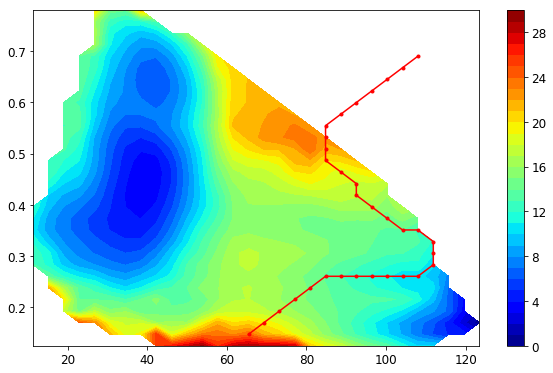

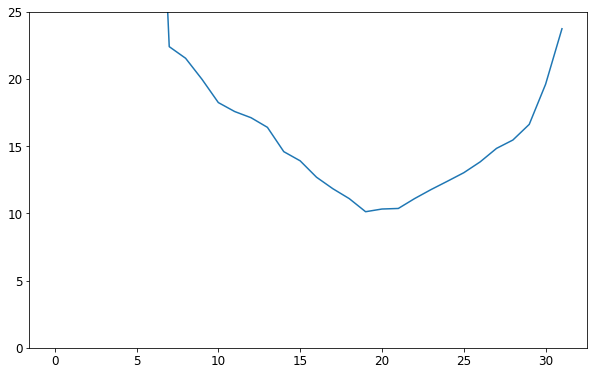

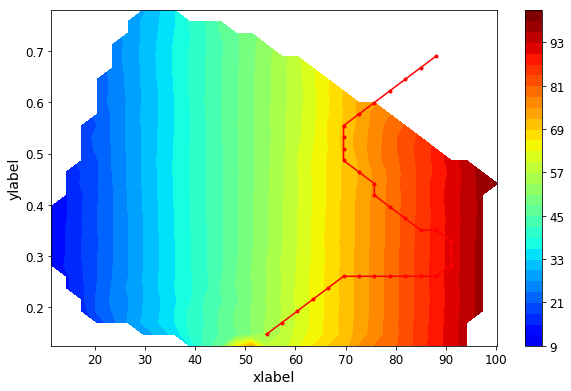

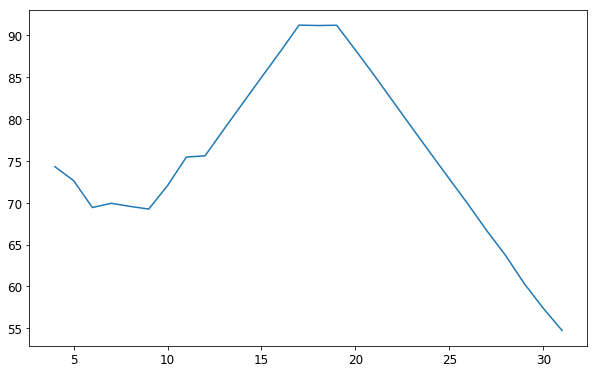

In [85]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 300
location = pre + "/seventh_with_real_distance/_280-350/2d_qw_dis/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path = shortest_path(location2, start=(1, 14))
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)

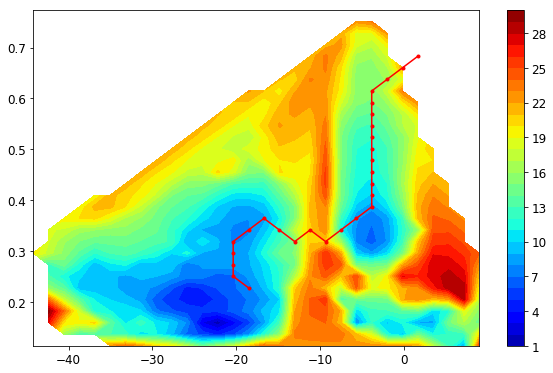

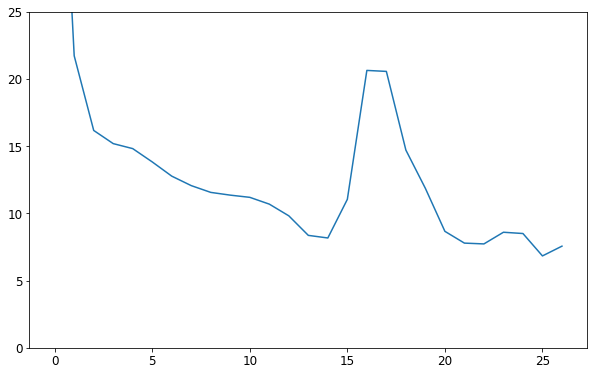

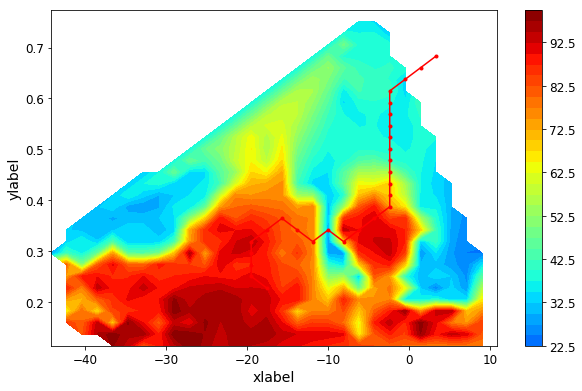

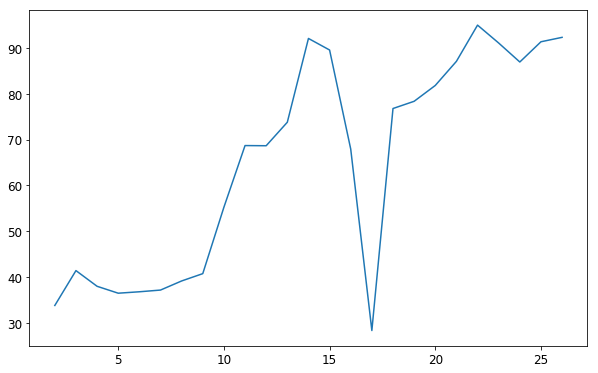

In [37]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 300
location = pre + "/sixth_first_2/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path = shortest_path(location2, start=(5, 14))
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)

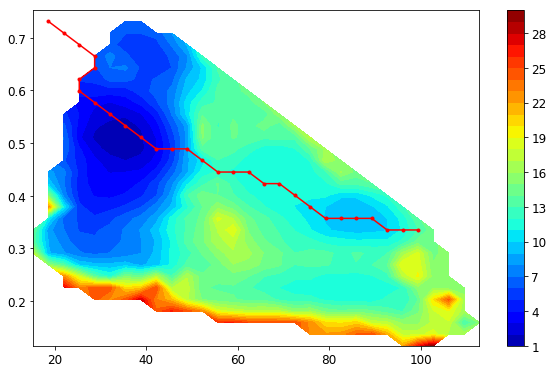

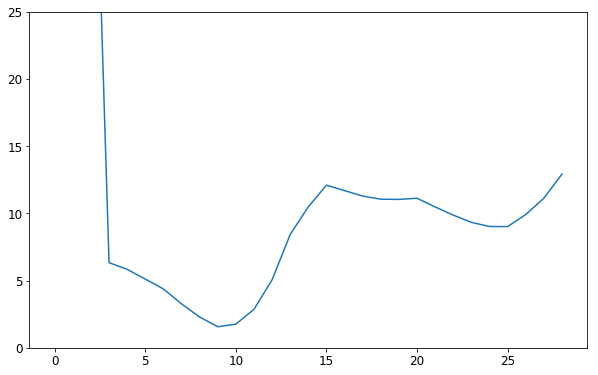

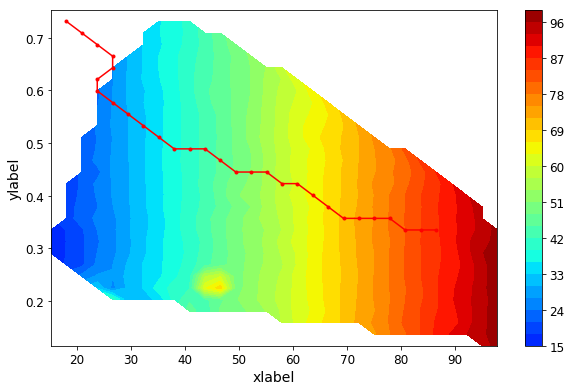

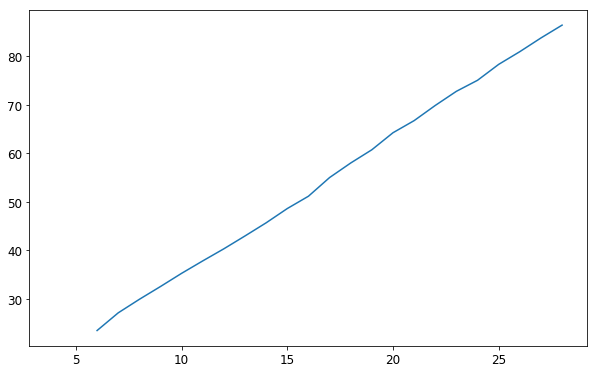

In [282]:
pre = "/Users/weilu/Research/server/mar_2018/04_week"
temp = 270
location = pre + "/sixth_with_real_distance_2/_280-350/2d_qw_dis/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, end=(28, 1), start=(10,25), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)